In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# For reproducibility
np.random.seed(42)

# Download AAPL data for the period 2014-01-01 to 2024-01-01
start_date = "2014-01-01"
end_date   = "2024-01-01"
ticker = "AAPL"

data = yf.download(ticker, start=start_date, end=end_date)
data = data[['Close']]  # We focus on the closing price
data.dropna(inplace=True)

print(data.head())


[*********************100%***********************]  1 of 1 completed

                Close
Date                 
2014-01-02  19.754642
2014-01-03  19.320715
2014-01-06  19.426071
2014-01-07  19.287144
2014-01-08  19.409286



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29292\1733562166.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [3]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define a helper function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Reshape X to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (2456, 60, 1)
Shape of y: (2456,)


In [5]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model_lstm = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.summary()

# Train the model
history = model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - loss: 0.0344 - val_loss: 0.0016
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 8.4036e-04 - val_loss: 0.0035
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 9.7186e-04 - val_loss: 0.0013
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 9.1402e-04 - val_loss: 0.0013
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 8.9117e-04 - val_loss: 0.0024
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━

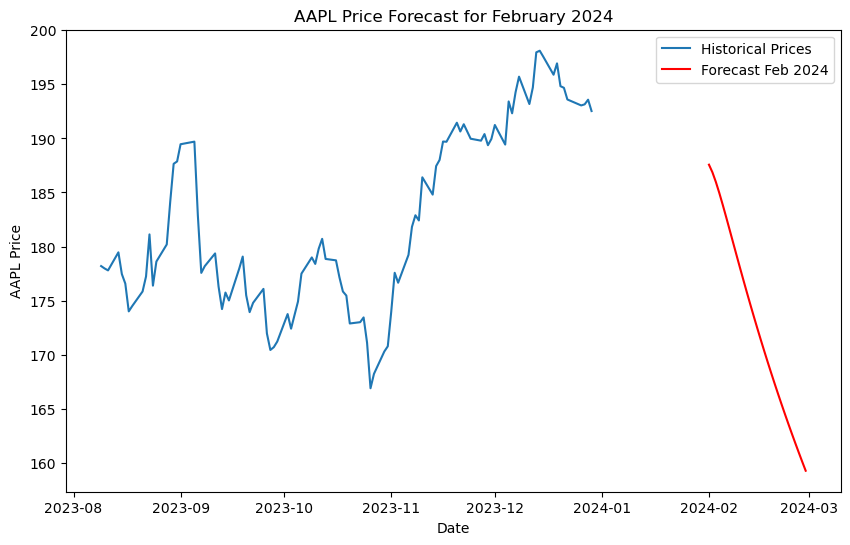

In [9]:
# Let's assume February 2024 has 29 days (leap year considerations)
forecast_days = 29

# Get the last sequence from our available data (the last 'seq_length' days of 2023-12-31)
last_sequence = scaled_data[-seq_length:]
forecast_input = last_sequence.reshape(1, seq_length, 1)

predictions_scaled = []
for _ in range(forecast_days):
    pred = model_lstm.predict(forecast_input)
    predictions_scaled.append(pred[0, 0])
    # Append the prediction to the sequence and remove the first value
    new_seq = np.append(forecast_input[0,1:,0], pred[0,0])
    forecast_input = new_seq.reshape(1, seq_length, 1)

# Convert predictions back to original scale
predictions = scaler.inverse_transform(np.array(predictions_scaled).reshape(-1,1))

# Create a date range for February 2024
forecast_dates = pd.date_range(start="2024-02-01", periods=forecast_days)
forecast_df = pd.DataFrame(data=predictions, index=forecast_dates, columns=["Predicted_Close"])

print(forecast_df.head())

# Plot the forecast
plt.figure(figsize=(10,6))
plt.plot(data.index[-100:], data['Close'].tail(100), label='Historical Prices')
plt.plot(forecast_df.index, forecast_df['Predicted_Close'], label='Forecast Feb 2024', color='red')
plt.xlabel("Date")
plt.ylabel("AAPL Price")
plt.title("AAPL Price Forecast for February 2024")
plt.legend()
plt.show()


In [13]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification, pipeline

# Load the FinBERT model and tokenizer using TensorFlow's model class
finbert_model_name = "yiyanghkust/finbert-tone"
tokenizer = AutoTokenizer.from_pretrained(finbert_model_name)
model_finbert = TFAutoModelForSequenceClassification.from_pretrained(finbert_model_name)

# Create a sentiment analysis pipeline using the TensorFlow model
finbert_pipeline = pipeline("sentiment-analysis", model=model_finbert, tokenizer=tokenizer)

# Example texts for sentiment analysis
texts = [
    "Apple's new product has received outstanding reviews from technology experts.",
    "There are concerns over Apple's supply chain disruptions amid global uncertainties.",
    "Investors are neutral about Apple's future prospects after mixed quarterly earnings."
]

# Analyze sentiment
sentiments = finbert_pipeline(texts)
for text, sentiment in zip(texts, sentiments):
    print(f"Text: {text}\nSentiment: {sentiment}\n")


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at yiyanghkust/finbert-tone.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.
Device set to use 0


Text: Apple's new product has received outstanding reviews from technology experts.
Sentiment: {'label': 'Positive', 'score': 0.9999961853027344}

Text: There are concerns over Apple's supply chain disruptions amid global uncertainties.
Sentiment: {'label': 'Negative', 'score': 0.9999990463256836}

Text: Investors are neutral about Apple's future prospects after mixed quarterly earnings.
Sentiment: {'label': 'Negative', 'score': 0.9998602867126465}



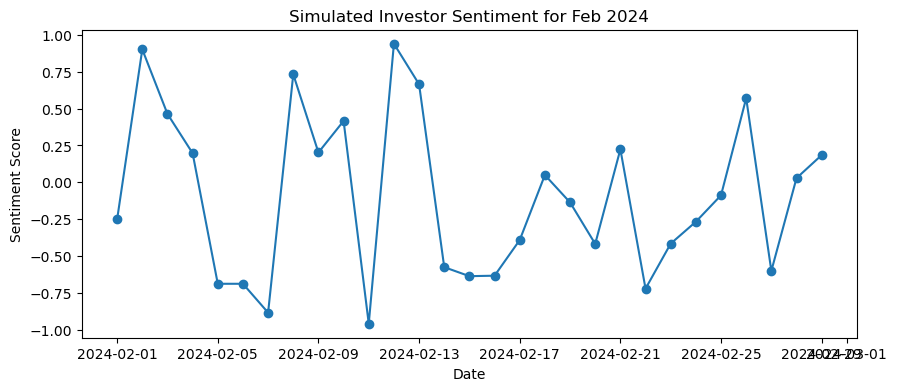

In [15]:
# For demonstration, simulate a sentiment score for each forecast day.
# In practice, you would compute these from your news data.
np.random.seed(42)
sentiment_scores = np.random.uniform(low=-1, high=1, size=forecast_days)
sentiment_df = pd.DataFrame(data=sentiment_scores, index=forecast_dates, columns=["Sentiment_Score"])

# Plot the simulated sentiment scores
plt.figure(figsize=(10,4))
plt.plot(sentiment_df.index, sentiment_df["Sentiment_Score"], marker='o', linestyle='-')
plt.title("Simulated Investor Sentiment for Feb 2024")
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.show()


In [17]:
# Combine the LSTM predictions and sentiment scores into a DataFrame
combined_df = forecast_df.join(sentiment_df)
combined_df.dropna(inplace=True)
print(combined_df.head())

# For demonstration purposes, let’s assume the “true” price is not known.
# In practice, you would have historical data for training.
# Here, we simulate a target that is a slight adjustment to the LSTM forecast based on sentiment.
combined_df['Target'] = combined_df['Predicted_Close'] * (1 + 0.01 * combined_df['Sentiment_Score'])
print(combined_df.head())

# Prepare features and target
X_final = combined_df[['Predicted_Close', 'Sentiment_Score']].values
y_final = combined_df['Target'].values


            Predicted_Close  Sentiment_Score
2024-02-01       187.568756        -0.250920
2024-02-02       186.862320         0.901429
2024-02-03       185.964752         0.463988
2024-02-04       184.941788         0.197317
2024-02-05       183.840500        -0.687963
            Predicted_Close  Sentiment_Score      Target
2024-02-01       187.568756        -0.250920  187.098109
2024-02-02       186.862320         0.901429  188.546750
2024-02-03       185.964752         0.463988  186.827606
2024-02-04       184.941788         0.197317  185.306709
2024-02-05       183.840500        -0.687963  182.575746


In [19]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate

# Define model inputs
input_features = Input(shape=(2,), name="combined_input")

# A small feed-forward network
x = Dense(32, activation='relu')(input_features)
x = Dense(16, activation='relu')(x)
final_output = Dense(1, name="final_prediction")(x)

ensemble_model = Model(inputs=input_features, outputs=final_output)
ensemble_model.compile(optimizer='adam', loss='mean_squared_error')
ensemble_model.summary()

# Train the model on our simulated data (in practice, use historical training data)
ensemble_model.fit(X_final, y_final, epochs=50, batch_size=4, verbose=1)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ combined_input (InputLayer)     │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ final_prediction (Dense)        │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 22412.8184
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20804.1797  
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19422.4629 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16692.7871 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14985.0430 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13163.8682 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11096.6807 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 9202.7100
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 7272.3242
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5206.2852 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 3328.0945
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1947.3296 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 930.7964
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 353.6943 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
            Predicted_Close  Sentiment_Score      Target  Final_Prediction
2024-02-01       187.568756        -0.250920  187.098109        187.339600
2024-02-02       186.862320         0.901429  188.546750        186.621613
2024-02-03       185.964752         0.463988  186.827606        185.733261
2024-02-04       184.941788         0.197317  185.306709        184.717880
2024-02-05       183.840500        -0.687963  182.575746        183.632248
2024-02-06       182.693893        -0.688011  181.436939        182.490372
2024-02-07       181.524658        -0.883833  179.920284        181.328445
2024-02-08       180.347977         0.732352  181.668759        180.136337
2024-02-09       179.174118         0.202230  179.536462        178.973999
2024-02-10       178.009613         0.416145  178.750391        177.811630
2024-02-11       176.858795        -0.958831  175.163018        176.682831
2024-02-12       175.724335         0.939820  177.375827     

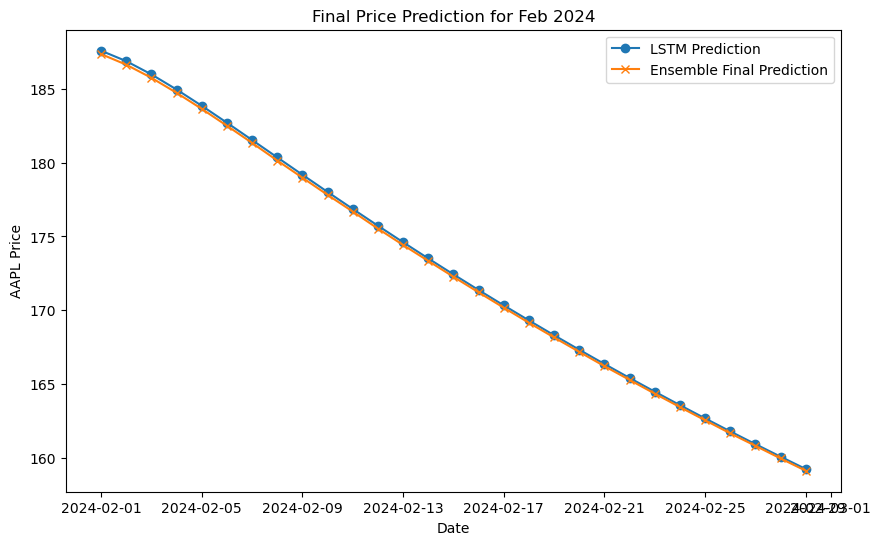

In [21]:
final_predictions = ensemble_model.predict(X_final)
combined_df['Final_Prediction'] = final_predictions

print(combined_df)

# Plot the comparison between the LSTM prediction and the final ensemble prediction
plt.figure(figsize=(10,6))
plt.plot(combined_df.index, combined_df['Predicted_Close'], label='LSTM Prediction', marker='o')
plt.plot(combined_df.index, combined_df['Final_Prediction'], label='Ensemble Final Prediction', marker='x')
plt.xlabel("Date")
plt.ylabel("AAPL Price")
plt.title("Final Price Prediction for Feb 2024")
plt.legend()
plt.show()


In [23]:
import yfinance as yf
import pandas as pd

# Define ticker and date range for February 2024
ticker = "AAPL"
start_date = "2024-02-01"
end_date = "2024-03-01"  # End date is exclusive, so this covers Feb 1 - Feb 29

# Download daily data for February 2024
real_data = yf.download(ticker, start=start_date, end=end_date)
# We will use the closing price as the real price
real_data = real_data[['Close']]
real_data.rename(columns={'Close': 'Actual_Close'}, inplace=True)
real_data.dropna(inplace=True)

print(real_data.head())


[*********************100%***********************]  1 of 1 completed

            Actual_Close
Date                    
2024-02-01    186.860001
2024-02-02    185.850006
2024-02-05    187.679993
2024-02-06    189.300003
2024-02-07    189.410004



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29292\3432424135.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data.rename(columns={'Close': 'Actual_Close'}, inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29292\3432424135.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data.dropna(inplace=True)


In [25]:
# Merge the dataframes on their date index
comparison_df = combined_df.join(real_data, how="inner")
comparison_df.dropna(inplace=True)  # in case there are missing values
print(comparison_df.head())


            Predicted_Close  Sentiment_Score      Target  Final_Prediction  \
2024-02-01       187.568756        -0.250920  187.098109        187.339600   
2024-02-02       186.862320         0.901429  188.546750        186.621613   
2024-02-05       183.840500        -0.687963  182.575746        183.632248   
2024-02-06       182.693893        -0.688011  181.436939        182.490372   
2024-02-07       181.524658        -0.883833  179.920284        181.328445   

            Actual_Close  
2024-02-01    186.860001  
2024-02-02    185.850006  
2024-02-05    187.679993  
2024-02-06    189.300003  
2024-02-07    189.410004  


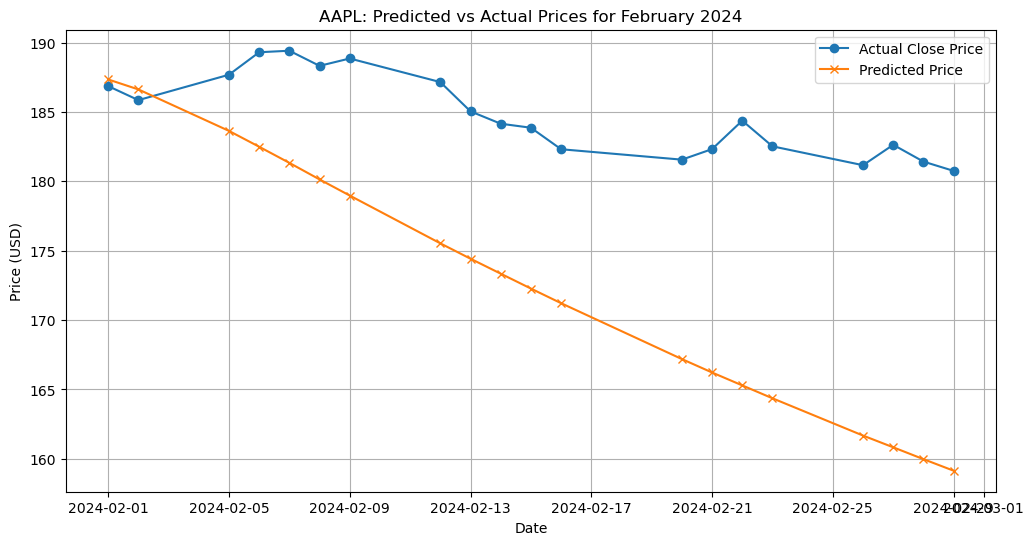

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(comparison_df.index, comparison_df['Actual_Close'], label="Actual Close Price", marker='o')
plt.plot(comparison_df.index, comparison_df['Final_Prediction'], label="Predicted Price", marker='x')
plt.title("AAPL: Predicted vs Actual Prices for February 2024")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


In [29]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Extract the actual and predicted values
y_true = comparison_df['Actual_Close']
y_pred = comparison_df['Final_Prediction']

mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred) * 100  # in percentage
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")


Mean Absolute Error (MAE): $12.30
Mean Absolute Percentage Error (MAPE): 6.70%
Root Mean Squared Error (RMSE): $13.89
